<a href="https://colab.research.google.com/github/NguyenSLam/Report_for_homework_Artificial-Intelligence-/blob/main/5kinds_of_flowers_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
     

folder = '/content/drive/MyDrive/AI_Picture/Flowers_Data/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('daisy'):
    output= 1.0
  if file.startswith('bluebell'):
    output= 2.0
  if file.startswith('apricot'):
    output= 3.0
  if file.startswith('lotus'):
    output= 4.0
  if file.startswith('rose'):
    output= 5.0

  photo = load_img(folder + file, target_size= (50,50))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/flower_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/flower_labels', labels)

(1012, 50, 50, 3) (1012,)


In [ ]:
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(101, 50, 50, 3) (911, 50, 50, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((911, 50, 50, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((101, 50, 50, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 30
classes = 6

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (50, 50, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                      

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/30
15/15 [==============================] - 4s 27ms/step - loss: 2.0182 - accuracy: 0.3030
Epoch 2/30
15/15 [==============================] - 0s 21ms/step - loss: 1.5807 - accuracy: 0.2854
Epoch 3/30
15/15 [==============================] - 0s 22ms/step - loss: 1.4642 - accuracy: 0.3611
Epoch 4/30
15/15 [==============================] - 0s 21ms/step - loss: 1.3799 - accuracy: 0.4314
Epoch 5/30
15/15 [==============================] - 0s 21ms/step - loss: 1.2843 - accuracy: 0.5038
Epoch 6/30
15/15 [==============================] - 0s 20ms/step - loss: 1.3092 - accuracy: 0.4940
Epoch 7/30
15/15 [==============================] - 0s 21ms/step - loss: 1.1091 - accuracy: 0.5851
Epoch 8/30
15/15 [==============================] - 0s 20ms/step - loss: 1.0438 - accuracy: 0.5642
Epoch 9/30
15/15 [==============================] - 0s 20ms/step - loss: 0.8806 - accuracy: 0.6520
Epoch 10/30
15/15 [==============================] - 0s 20ms/step - loss: 0.8050 - accuracy: 0.6773
Epoch 11/

In [ ]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 8ms/step - loss: 1.0578 - accuracy: 0.8713
Test accuracy: 0.8712871074676514


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/mang_model_ANN/flowers.h5')

1/1 [==============================] - 0s 95ms/step
bluebell


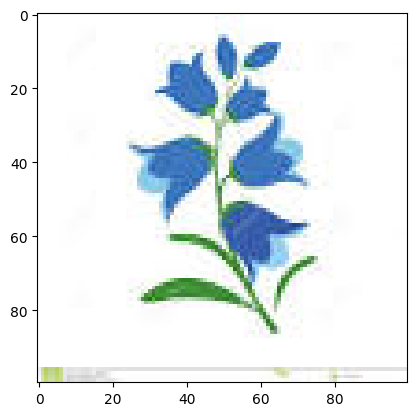

1/1 [==============================] - 0s 18ms/step
bluebell


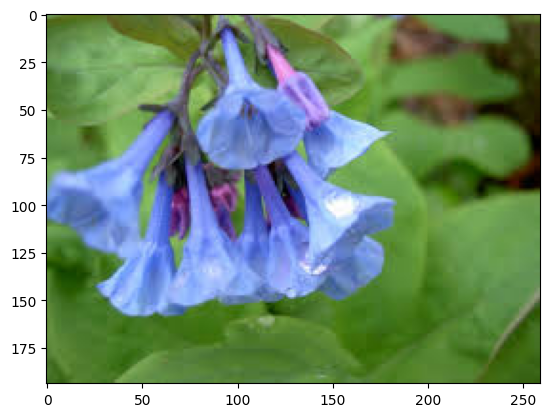

1/1 [==============================] - 0s 17ms/step
apricot


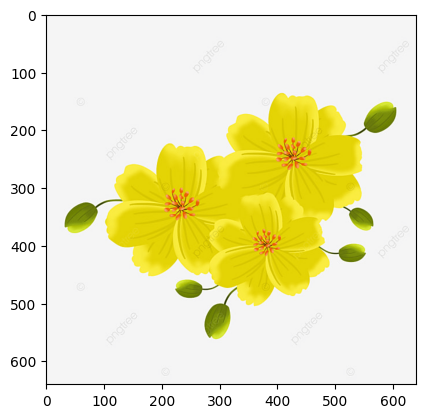

1/1 [==============================] - 0s 22ms/step
apricot


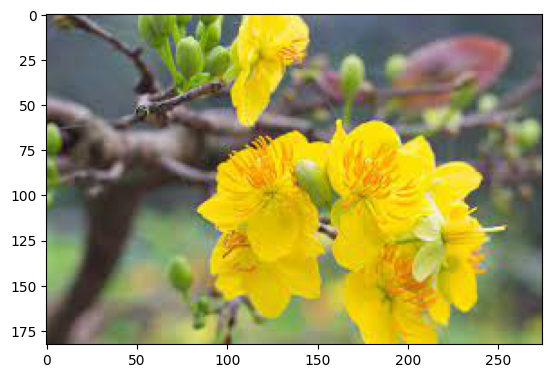

1/1 [==============================] - 0s 41ms/step
daisy


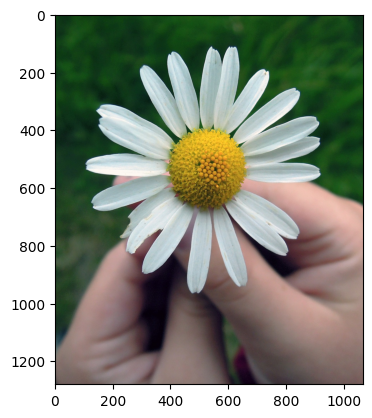

1/1 [==============================] - 0s 24ms/step
daisy


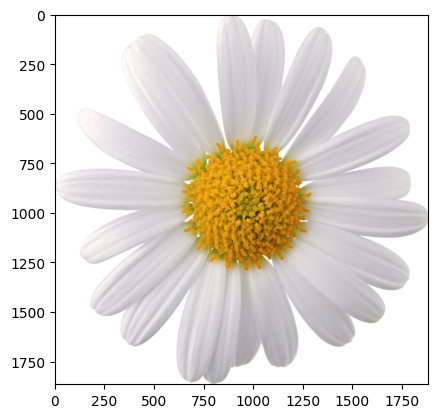

1/1 [==============================] - 0s 17ms/step
lotus


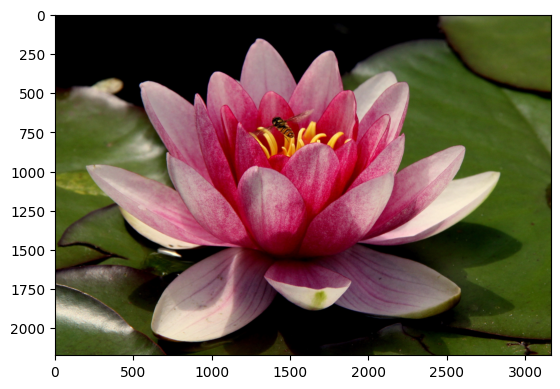

1/1 [==============================] - 0s 18ms/step
lotus


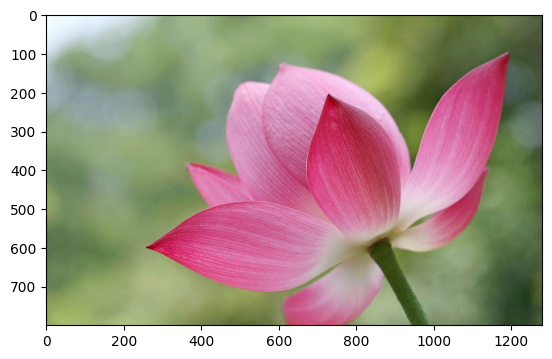

1/1 [==============================] - 0s 31ms/step
rose


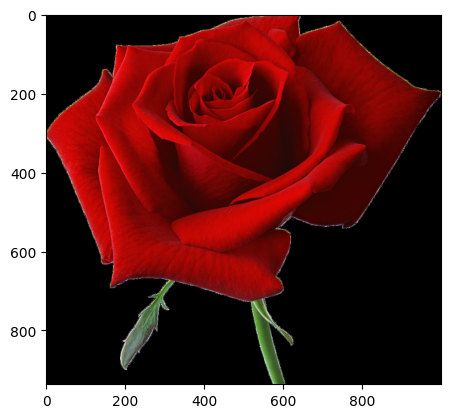

1/1 [==============================] - 0s 25ms/step
rose


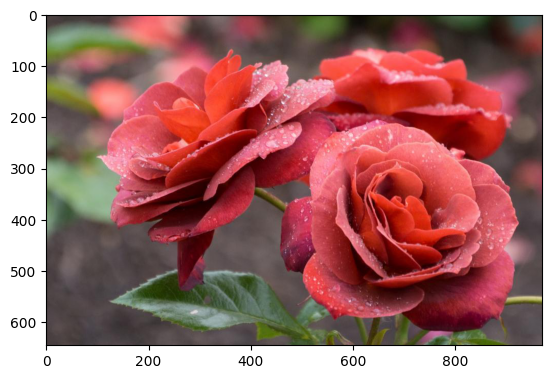

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Flowers_Data/Test/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (50, 50))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','daisy', 'bluebell', 'apricot', 'lotus', 'rose']
  print(class_name[result])
  plt.show()